<a href="https://colab.research.google.com/github/kesavakrishna/Bid-ask-spread/blob/main/Bibliometric%20Analysis/code/co_citation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import itertools

# Load input paper data from two datasets into pandas DataFrames
df1 = pd.read_csv('/content/scopus 112_new.csv')  # Replace 'paper1.csv' with the file path or URL for your first paper data
df2 = pd.read_csv('/content/scopus 21bid_ask.csv')  # Replace 'paper2.csv' with the file path or URL for your second paper data

# Extract references from each paper in the datasets
references1 = df1['References'].tolist()  # Assuming the references are stored in a column named 'References' in the DataFrame
references2 = df2['References'].tolist()

# Create a graph to represent co-citation relationships
graph = nx.Graph()

# Iterate through all combinations of references from the two datasets
for ref1, ref2 in itertools.product(references1, references2):
    # Check if the references have at least one common paper citation
    if any(paper in ref2 for paper in ref1):
        # Add an edge between the two references in the graph
        graph.add_edge(ref1, ref2)

# Perform co-citation analysis
co_citations = graph.edges()

# Convert EdgeView to a list before slicing
co_citations = list(graph.edges())

# Print co-citation relationships with a limit
print("Co-citation relationships (with s.no, first 234):")
for i, co_citation in enumerate(co_citations[:234]):
    print(f"{i+1}. {co_citation}")


Co-citation relationships (with s.no, first 234):
1. ('Liu, C., Chang, C., Chang, Z., Maximum Varma entropy distribution with conditional value at risk constraints (2020) Entropy, 22. , 33286435; Maheshwari, A., Pirvu, T.A., Portfolio optimization under correlation constraint (2020) Risks, 8; Wang, D., Chen, Y., Wang, H., Huang, M., Formulation of the non-parametric value at risk portfolio selection problem considering symmetry (2020) Symmetry, 12; Black, F., Scholes, M., The pricing of options and corporate liabilities (1973) J. Political Econ, 81, pp. 637-654; Pennanen, T., Introduction to convex optimization in financial markets (2012) Math. Program, 134, pp. 157-186; Pennanen, T., Optimal investment and contingent claim valuation in illiquid markets (2014) Financ. Stochastics, 18, pp. 733-754; Nonsoong, P., Mekchay, K., Rujivan, S., An analytical option pricing formula for mean-reverting asset with time-dependent parameter (2021) ANZIAM J, 63, pp. 178-202; Chumpong, K., Tanadkithir

NameError: ignored

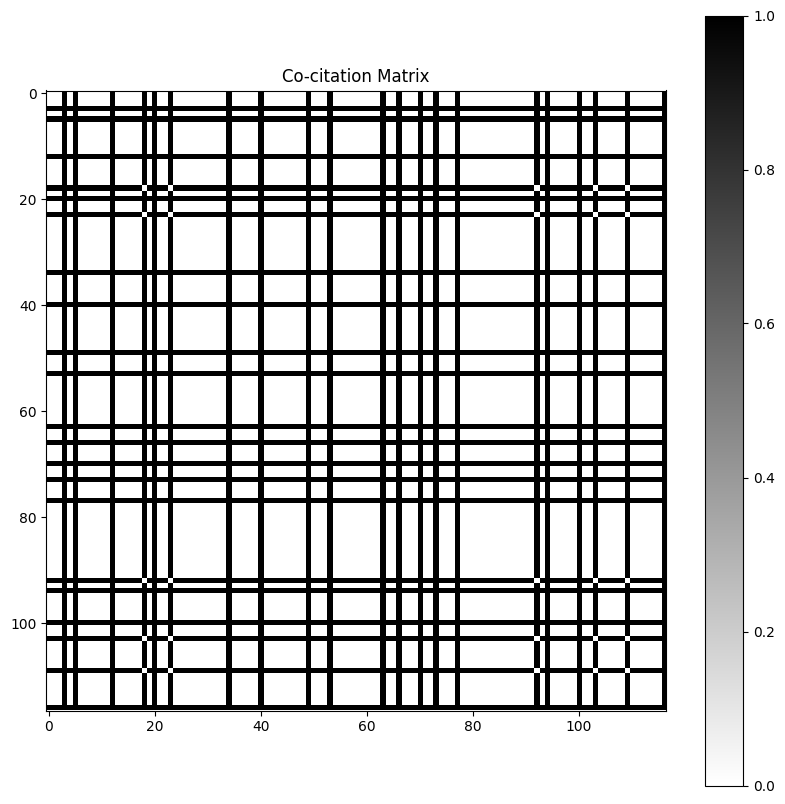

In [45]:
# Perform co-citation analysis
co_citations = graph.edges()

# Get a sorted list of all unique references
all_references = sorted(set(references1 + references2))

# Create a co-citation matrix
co_citation_matrix = np.zeros((len(all_references), len(all_references)))

for ref1, ref2 in co_citations:
    idx1 = all_references.index(ref1)
    idx2 = all_references.index(ref2)
    co_citation_matrix[idx1, idx2] = 1
    co_citation_matrix[idx2, idx1] = 1

# Visualize the co-citation matrix
plt.figure(figsize=(10, 10))
plt.imshow(co_citation_matrix, cmap='binary', interpolation='none')
plt.title('Co-citation Matrix')
plt.colorbar()
# Label the rows and columns
plt.xticks(range(len(all_references)), [index_to_reference[i] for i in range(len(all_references))], rotation=90)
plt.yticks(range(len(all_references)), [index_to_reference[i] for i in range(len(all_references))])
plt.show()